# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Reza Faisal 
- Email: rezha.faizal567@gmail.com
- Id Dicoding: rezaafaisal

## Persiapan

### Menyiapkan library yang dibutuhkan

In [32]:

import pandas as pd
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Menyiapkan data yang akan diguankan

In [33]:
data_df = pd.read_csv("data.csv", delimiter=';')

## Data Understanding

In [34]:
data_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [35]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [36]:
data_df.shape

(4424, 37)

## Data Preparation / Preprocessing

### Menangani Missing Value & Duplicate

In [37]:
# menghitung jumlah missing value
data_df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [38]:
# menghitung jumlah duplikat
data_df.duplicated().sum()

np.int64(0)

### Menangani Outlier

In [39]:
data_df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


<Axes: xlabel='Curricular_units_2nd_sem_enrolled'>

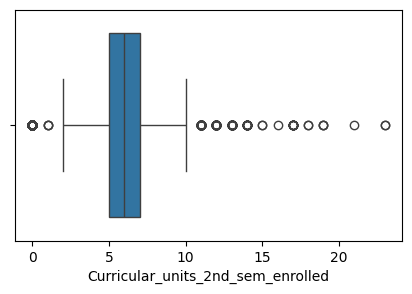

In [40]:
plt.figure(figsize=(5,3))
sns.boxplot(x=data_df['Curricular_units_2nd_sem_enrolled'])

<Axes: xlabel='Curricular_units_2nd_sem_evaluations'>

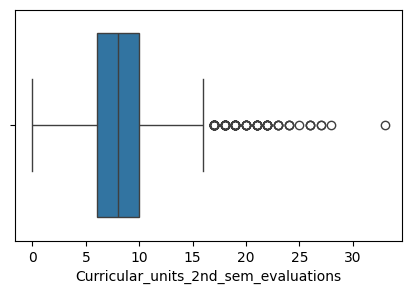

In [41]:
plt.figure(figsize=(5,3))
sns.boxplot(x=data_df['Curricular_units_2nd_sem_evaluations'])

<Axes: xlabel='Curricular_units_2nd_sem_approved'>

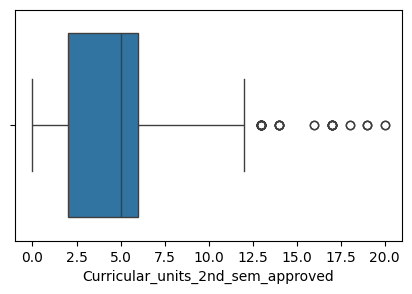

In [42]:
plt.figure(figsize=(5,3))
sns.boxplot(x=data_df['Curricular_units_2nd_sem_approved'])

In [43]:
# menghapus outlier
outlier_columns = ['Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved']

Q1 = data_df[outlier_columns].quantile(0.25)
Q3 = data_df[outlier_columns].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

new_df = data_df[~((data_df[outlier_columns] < lower_bound) | (data_df[outlier_columns] > upper_bound)).any(axis=1)]

In [44]:
new_df.shape

(4004, 37)

<Axes: xlabel='Curricular_units_2nd_sem_enrolled'>

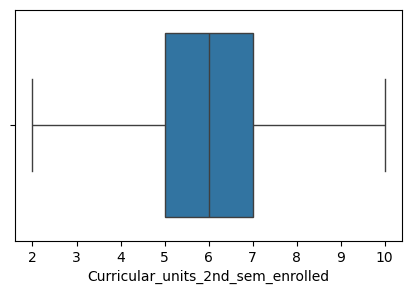

In [45]:
# cek outlier fitur Curricular_units_2nd_sem_enrolled
plt.figure(figsize=(5,3))
sns.boxplot(x=new_df['Curricular_units_2nd_sem_enrolled'])

### Mengubah target fitur menjadi boolean (0: dropout, 1: non-dropout (enrolled, graduate))

In [46]:
new_df['Status'] = new_df['Status'].map({'Graduate': 1, 'Dropout': 0, 'Enrolled': 1}).fillna(new_df['Status'])

/tmp/ipykernel_32763/1683898483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Status'] = new_df['Status'].map({'Graduate': 1, 'Dropout': 0, 'Enrolled': 1}).fillna(new_df['Status'])


### Menentukan fitur dengan 10 korelasi tertinggi

Text(0.5, 1.0, 'Korelasi Untuk Fitur Numerik')

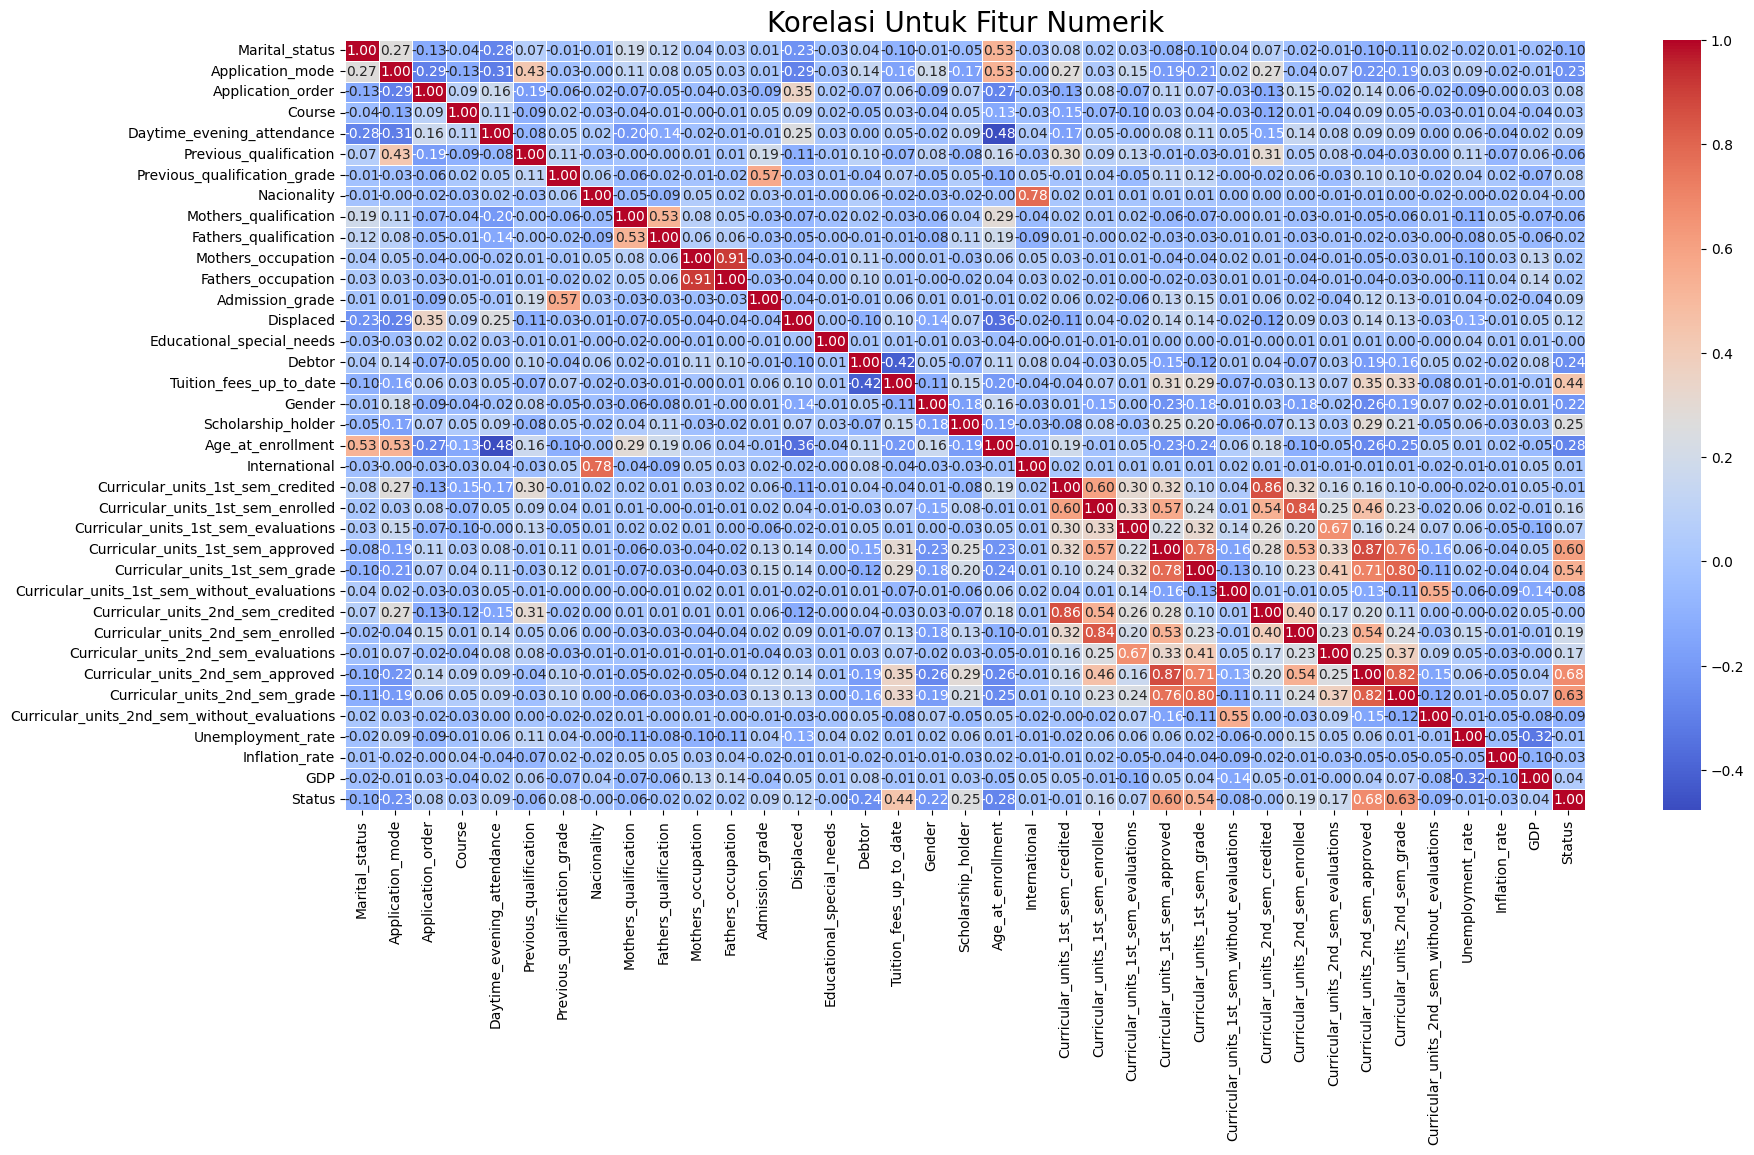

In [47]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=new_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Korelasi Untuk Fitur Numerik", size=20)

In [48]:
new_df.corrwith(new_df['Status']).sort_values(ascending=False)

Status                                          1.000000
Curricular_units_2nd_sem_approved               0.681053
Curricular_units_2nd_sem_grade                  0.632688
Curricular_units_1st_sem_approved               0.603617
Curricular_units_1st_sem_grade                  0.538662
Tuition_fees_up_to_date                         0.441792
Scholarship_holder                              0.253533
Curricular_units_2nd_sem_enrolled               0.191289
Curricular_units_2nd_sem_evaluations            0.168743
Curricular_units_1st_sem_enrolled               0.156395
Displaced                                       0.116511
Admission_grade                                 0.091265
Daytime_evening_attendance                      0.085789
Previous_qualification_grade                    0.081900
Application_order                               0.077128
Curricular_units_1st_sem_evaluations            0.074857
GDP                                             0.043506
Course                         

pada hasil korelasi, terdapat 10 fitur tertinggi yang dapat dijadikan sebagai fitur untuk pelatihan model :

- Curricular_units_2nd_sem_approved               
- Circular_units_2nd_sem_grade
- Curricular_units_1st_sem_approved               
- Curricular_units_1st_sem_grade                  
- Tuition_fees_up_to_date                         
- Scholarship_holder                              
- Curricular_units_2nd_sem_enrolled               
- Curricular_units_2nd_sem_evaluations            
- Curricular_units_1st_sem_enrolled               
- Displaced                                       

In [49]:
selected_df = new_df[[
   "Curricular_units_2nd_sem_approved",
   "Curricular_units_2nd_sem_grade",
   "Curricular_units_1st_sem_approved",
   "Curricular_units_1st_sem_grade",
   "Tuition_fees_up_to_date",
   "Scholarship_holder",
   "Curricular_units_2nd_sem_enrolled",
   "Curricular_units_1st_sem_enrolled",
   "Curricular_units_2nd_sem_evaluations",
   "Displaced", "Status",
]]

In [50]:
selected_df.head()

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Curricular_units_2nd_sem_enrolled,Curricular_units_1st_sem_enrolled,Curricular_units_2nd_sem_evaluations,Displaced,Status
1,6,13.666667,6,14.000000,0,0,6,6,6,1,1
2,0,0.000000,0,0.000000,0,0,6,6,0,1,0
3,5,12.400000,6,13.428571,1,0,6,6,10,1,1
4,6,13.000000,5,12.333333,1,0,6,6,6,0,1
6,8,14.345000,7,13.300000,1,1,8,7,8,1,1


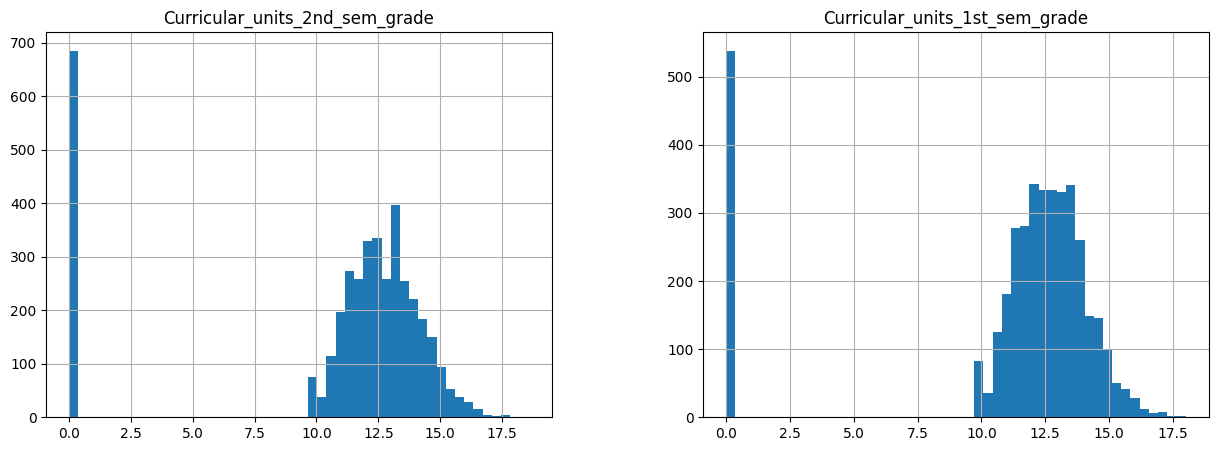

In [51]:
# menghitung numerik

selected_df[['Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_grade']].hist(bins=50, figsize=(15, 5))
plt.show()

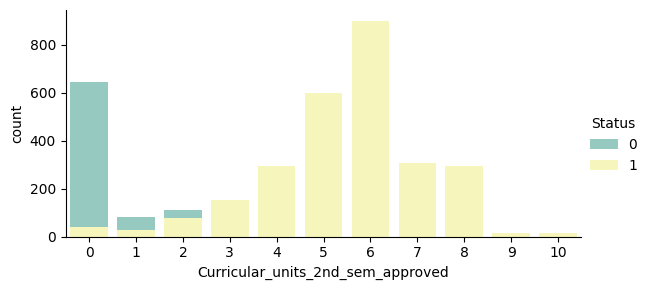

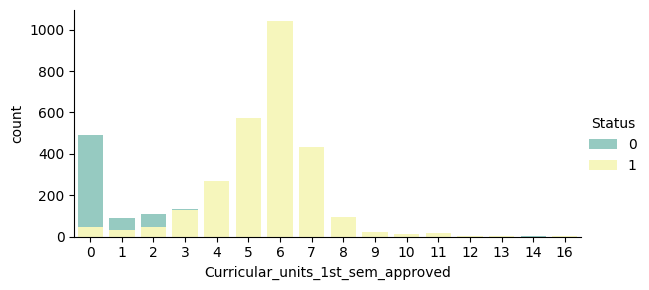

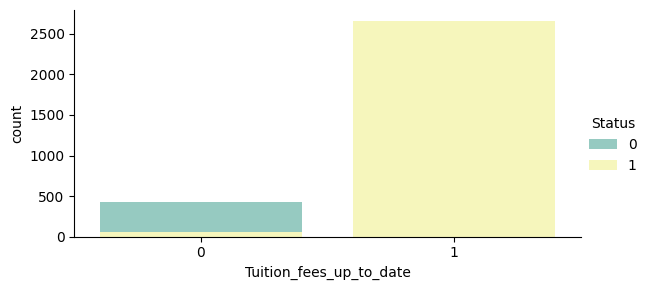

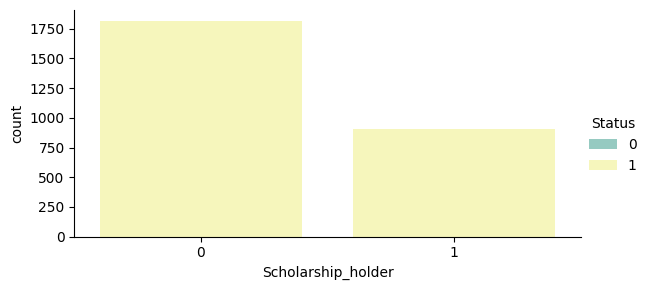

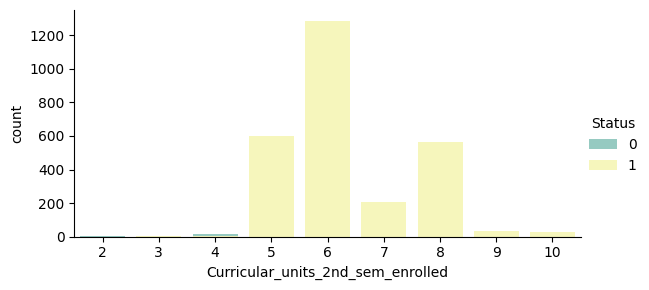

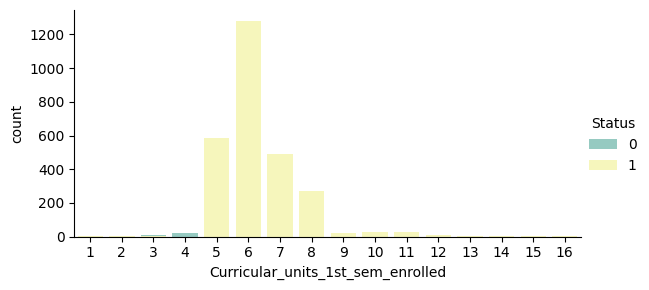

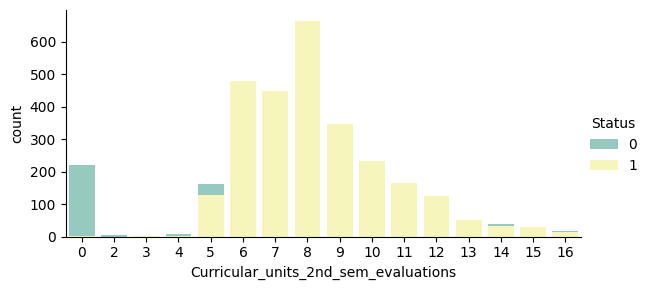

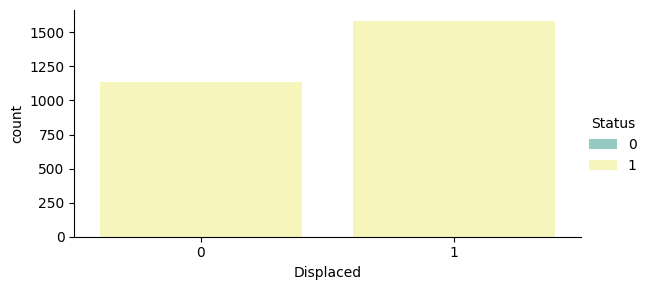

In [52]:
for column in selected_df.columns.drop(['Status', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_grade']):
  sns.catplot(x=column, kind='count', dodge=False, palette="Set3", hue='Status', height=3, aspect=2, data=selected_df)
  plt.xlabel(column.capitalize())
  # plt.xticks(rotation=45)
  plt.show()
  print("\n")

In [53]:
selected_df.to_csv("cleaned.csv", index=False)

In [61]:
selected_df.describe()

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Curricular_units_2nd_sem_enrolled,Curricular_units_1st_sem_enrolled,Curricular_units_2nd_sem_evaluations,Displaced,Status
count,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000
mean,4.327173,10.567570,4.536464,11.006262,0.879121,0.256494,6.199301,6.165834,7.935814,0.542458,0.679820
std,2.547348,4.965581,2.419407,4.515830,0.326027,0.436752,1.123740,1.217317,3.038618,0.498256,0.466604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,11.000000,3.000000,11.250000,1.000000,0.000000,5.000000,5.000000,6.000000,0.000000,0.000000
50%,5.000000,12.333333,5.000000,12.333333,1.000000,0.000000,6.000000,6.000000,8.000000,1.000000,1.000000
75%,6.000000,13.428571,6.000000,13.443254,1.000000,1.000000,7.000000,7.000000,10.000000,1.000000,1.000000
max,10.000000,18.571429,16.000000,18.000000,1.000000,1.000000,10.000000,16.000000,16.000000,1.000000,1.000000


## Modeling

In [54]:
# bagi data latih dan data uji
x = selected_df.drop(['Status'], axis=1)
y = selected_df['Status']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [65]:
x_train

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Curricular_units_2nd_sem_enrolled,Curricular_units_1st_sem_enrolled,Curricular_units_2nd_sem_evaluations,Displaced
2572,6,14.166667,6,12.625000,1,0,6,6,6,0
2556,5,11.400000,4,12.000000,1,0,5,5,6,0
2302,2,11.000000,5,10.666667,1,1,5,5,11,0
3304,6,13.833333,6,14.666667,1,1,6,6,6,0
3634,4,12.750000,4,12.750000,1,0,5,5,6,0
...,...,...,...,...,...,...,...,...,...,...
4234,4,11.250000,3,10.500000,1,0,5,5,10,1
1186,10,12.968182,11,12.700000,1,0,10,11,12,1
4399,6,14.333333,6,13.875000,1,1,6,6,6,1
254,5,10.800000,5,12.400000,1,0,5,5,6,0


In [55]:
print(f"Total data latih : {len(x_train)}")
print(f"Total data uji : {len(x_test)}")

Total data latih : 3203
Total data uji : 801


In [56]:
nn_classifier = MLPClassifier(hidden_layer_sizes=12,
                              activation='relu',
                              n_iter_no_change=30,
                              solver='adam')
nn_classifier.fit(x_train, y_train)

/home/razhura/miniconda3/envs/data-science/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=12, n_iter_no_change=30)

In [57]:
joblib.dump(nn_classifier, 'model/student_dropout_model.joblib')

['model/student_dropout_model.joblib']

## Evaluation

Akurasi : 0.8876404494382022
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       263
           1       0.90      0.93      0.92       538

    accuracy                           0.89       801
   macro avg       0.88      0.86      0.87       801
weighted avg       0.89      0.89      0.89       801



Text(0.5, 1.0, 'Confusion Matrix')

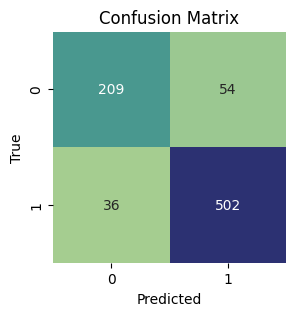

In [58]:
# akurasi
predict = nn_classifier.predict(x_test)

accuracy = accuracy_score(y_test, predict)
print(f"Akurasi : {accuracy}")

# classification report
class_report = classification_report(y_test, predict)
print(class_report)

# konfusion matriks
conf = confusion_matrix(y_test, predict)

plt.figure(figsize=(3,3))
sns.heatmap(conf, annot=True, fmt='d', cmap='crest', cbar=False)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

## Testing

In [66]:
data_to_predict = {
   "Curricular_units_2nd_sem_approved": 7,
   "Curricular_units_2nd_sem_grade": 12,
   "Curricular_units_1st_sem_approved" : 2,
   "Curricular_units_1st_sem_grade": 10,
   "Tuition_fees_up_to_date": 1,
   "Scholarship_holder": 0,
   "Curricular_units_2nd_sem_enrolled": 3,
   "Curricular_units_1st_sem_enrolled": 7,
   "Curricular_units_2nd_sem_evaluations": 10,
   "Displaced": 1
}

data_predict_df = pd.DataFrame(data_to_predict, index=[0])

In [68]:
result = nn_classifier.predict_proba(data_predict_df)


label = ['Dropout', 'No Dropout']
print("Probability", result)
print(f"Result : {label[np.argmax(result)]}")

Probability [[0.09792711 0.90207289]]
Result : No Dropout


In [72]:
res = nn_classifier.predict(data_predict_df)
label[np.argmax(res)]

'Dropout'